This is my first attempt of using Plotly and creating some interactive graphs like some maps and charts. Not all the visuals are interactive as Plotly lacks some features. In order to see the interactivity, do move your cursor on the visuals.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

celebrity_deaths_4.csv



In [2]:
deaths=pd.read_csv('../input/celebrity_deaths_4.csv',encoding='ISO-8859-1')

In [3]:
deaths.head(2) #checking the top 2 rows

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality,fame_score
0,85,1921,natural causes,January,2006,businessman chairman of IBM (1973ÛÒ1981),Frank Cary,American,1.0
1,49,1957,murdered,January,2006,musician (House of Freaks Gutterball),Bryan Harvey,American,2.0


In [4]:
deaths.isnull().sum() #checking for null values

age                   0
birth_year            0
cause_of_death    12484
death_month           0
death_year            0
famous_for           18
name                  0
nationality           0
fame_score         1606
dtype: int64

A lot many null values can be seen in the**cause_of_death** column. We just can't drop it so we will rename it as **Unknown**.

Similarly we will rename the null values in **famous_for** as **Unknown**.

In [5]:
for i in deaths[['cause_of_death','famous_for','nationality']]: #checking for no of unique values
    print('number of Unique Values for ',i,'are:',deaths[i].nunique())

number of Unique Values for  cause_of_death are: 1722
number of Unique Values for  famous_for are: 18603
number of Unique Values for  nationality are: 496


**Observations:**

 1. A lot too many unique values for the **cause_of_death** column. As we had seen that it already has many null values. So the presence of so many unique values clearly states that many similar causes are named differently. Similar is the case with **famous_for**.
 2. Total Countries comes out to be 496 that is impossible. I will Try to reduce the number without loosing any valuable data.

A lot of cleaning has to be done for this dataset.

## A lot of Data Cleaning

In [6]:
deaths['cause_of_death'].fillna('unknown',inplace=True) #replacing the null values in cause_of_death and famous_for
deaths['famous_for'].fillna('unknown',inplace=True)
deaths.drop('fame_score',axis=1,inplace=True) #the fame_score was no use to me

I will be plotting few interactive maps. Thus the values in the nationality column has to be changed to the name of the countries for representing them on the maps. 

I will be replacing each value in the column one-by-one to the proper country name. I will do it manually as there was no other way of mapping them. Anyone with a better solution can please suggest.

In [7]:
deaths['nationality'].replace(['American','Canadian','German','British','Indian','Russian','Italian','French','Australian','English','Turkish','Irish','Israeli','Emirati','Jordanian','Indian-born','Korean','Syrian','Malaysian','Swedish','Bulgarian', 'Greek', 'Chilean', 'Finnish', 'Iraqi',
       'Austrian','Bangladeshi','Norwegian','Brazilian','Japanese','Dutch','Spanish','Scottish','Polish','Mexican','New','Argentine','Hungarian','Filipino','Romanian','Chinese','Belgian','Danish','Iranian','Pakistani','Ukrainian','Indonesian','Columbian','Nigerian','Swiss','Sri','Thai','Cuban','Taiwanese', 'Jamaican','Serbian','Colombian','Egyptian','Peruvian','Kenyan','Vietnamese','Tanzanian','Soviet','Hong','Argentinian','Singaporean','Canadian-born','German-born','Polish-born','Trinidadian','Trinidad','Namibian','Nepali','Portuguese','U.S.','Tibetan','Nepalese','Croatian','Afghan','Turkish-born','Spanish-born','Azerbaijani','Soviet-born','Zambian', 'Ghanaian'],
                              
                              ['United States','Canada','Germany','United Kingdom','India','Russia','Italy','France','Australia','United Kingdom','Turkey','Ireland','Israel','United Arab Emirates','Jordan',
                              'India','Korea','Syria','Malaysia','Sweden','Bulgaria','Greece','Chile','Finland','Iraq','Austria','Bangladesh','Norway','Brazil','Japan','Netherlands','Spain','Scotland','Poland','Mexico','New Zealand','Argentina','Hungary','Philippines','Romania','China','Belgium','Denmark','Iran','Pakistan','Ukraine','Indonesia','Columbia','Nigeria','Switzerland','Sri Lanka','Thailand','Cuba','Taiwan','Jamaica','Serbia','Colombia','Egypt','Peru','Kenya','Vietnam','Tanzania','Russia','Hongkong','Argentina','Singapore','Canada','Germany','Poland','Trinidad & Tobago','Trinidad & Tobago','Namibia','Nepal','Protugal','United States','Tibet','Nepal','Croatia','Afghanistan','Turkey','Spain','Azerbaijan','Russia','Zambia','Ghana'],inplace=True)
mask1 = deaths['nationality'] == 'South'
mask2 = deaths['famous_for'].str.contains('Korean')
mask3 = deaths['famous_for'].str.contains('Africa')

deaths.loc[mask1 & mask2, 'nationality']='South Korea'
deaths.loc[mask1 & mask3, 'nationality']='South Africa'

Since the **famous_for** column has many unique values, it indicates presence of many related terms. Like **business** and **entreprenuer** are counted different but the meanings are same. Also the values in the columns are not restricted to a single word. I have tried the best to manually find out similar and related terms do that they can be grouped together for better analysis.

**Any better solution please suggest .**

In [8]:
mask1 = deaths['famous_for'].str.contains('business|Business|entrepreneur')
mask2 = deaths['famous_for'].str.contains('Olympic|football|baseball|rugby|cricket|player|soccer|basketball|NFL|golf|hockey')
mask3 = deaths['famous_for'].str.contains('music|Music|sing|Sing|musician|composer|song|Song')
mask4 = deaths['famous_for'].str.contains('politician|minister|Politician|Minister|Parliament|parliament|Governor|governor|leader|Leader|council|Council|Assembly|Mayor|mayor')
mask5 = deaths['famous_for'].str.contains('actor|Actor|actress|Actress|film|Film|cinema|screenwriter')
mask6 = deaths['famous_for'].str.contains('author|Author')
mask7 = deaths['famous_for'].str.contains('Engineer|engineer')
mask8 = deaths['famous_for'].str.contains('Military|military|army|Army')

deaths.loc[True & mask1, 'famous_for']='Business'
deaths.loc[True & mask2, 'famous_for']='Sports'
deaths.loc[True & mask3, 'famous_for']='Music'
deaths.loc[True & mask4, 'famous_for']='Politics'
deaths.loc[True & mask5, 'famous_for']='Movies'
deaths.loc[True & mask6, 'famous_for']='Authors'
deaths.loc[True & mask7, 'famous_for']='Engineers'
deaths.loc[True & mask8, 'famous_for']='Military'
deaths['famous_for'].nunique()

7905

So I have reduced the number of unique values from **18603** to **7905**. More than 50% of the **famous_for** column values can now be grouped together for better analysis.

In [9]:
deaths['age_category']='' #adding a age category for the celebs
mask1=deaths['age']<18
mask2=(deaths['age']>=18) & (deaths['age']<30)
mask3=(deaths['age']>=30) & (deaths['age']<=60)
mask4=deaths['age']>60

deaths.loc[True & mask1, 'age_category']='Children'
deaths.loc[True & mask2, 'age_category']='Young'
deaths.loc[True & mask3, 'age_category']='Middle-Age'
deaths.loc[True & mask4, 'age_category']='Old'

I haven't made any changes to the **cause_of_death** till now. First we will do some generalized analysis and then dig in more in the later part.

Finally the cleaning part is done...:). Lets check the new dataframe.

In [10]:
deaths.head()

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality,age_category
0,85,1921,natural causes,January,2006,Business,Frank Cary,United States,Old
1,49,1957,murdered,January,2006,Music,Bryan Harvey,United States,Middle-Age
2,64,1942,Alzheimer's disease,January,2006,Sports,Paul Lindblad,United States,Old
3,86,1920,Alzheimer's disease,January,2006,Politics,Charles O. Porter,United States,Old
4,82,1924,cancer,January,2006,nightclub owner (Tropicana Club),Ofelia Fox,Cuba,Old


## Exploratory Analysis

### Distribution Of Ages

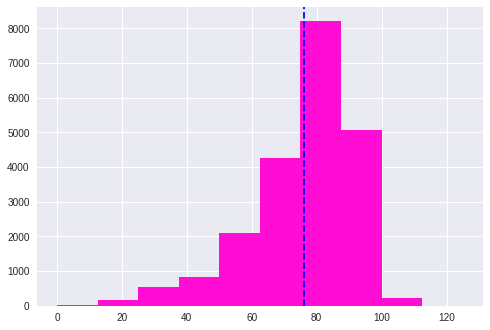

In [11]:
deaths['age'].hist(color='#ff0cd5')
plt.axvline(deaths['age'].mean(),linestyle='dashed',color='blue')

It can be seen that the majority of the age of the people in  the dataset are in the age bracket of (80-100) with the average being around 80.

### Number of Deaths by Years

In [12]:
data = [go.Bar(
            x=deaths['death_year'].value_counts().index,
            y=deaths['death_year'].value_counts().values,
        marker = dict(
        color = 'rgba(255, 0, 0,0.8)',)
            
)]

py.iplot(data, filename='horizontal-bar')

**Observations:**

 1. The number of deaths has steadily increased since 2006.

### Top Causes Of Deaths

In [13]:
type_deaths=deaths[deaths['cause_of_death']!='unknown']
type_deaths=type_deaths['cause_of_death'].value_counts()[:10]
data = [go.Bar(
            x=type_deaths.index,
            y=type_deaths.values,
        marker = dict(
        color = 'rgba(190, 130, 30,0.8)',)
            
)]

py.iplot(data, filename='horizontal-bar')

**Observations:**

 1. Cancer is the major cause for death followed by heart attacks.
 2. As said earlier, there are different types of cancer which are not generalized into one. We will now group the related terms together to check the cumulative values.

In [14]:
deaths_2=deaths.copy()

deaths_2.loc[deaths_2.cause_of_death.str.contains('cancer|Cancer'),'cause_of_death']='Cancer'
deaths_2.loc[deaths_2.cause_of_death.str.contains('heart|Heart|Cardiac|cardiac'),'cause_of_death']='Heart Problems'
deaths_2.loc[deaths_2.cause_of_death.str.contains('brain|Brain|stroke'),'cause_of_death']='Brain Complications'
deaths_2.loc[deaths_2.cause_of_death.str.contains('Alzheimer|alzheimer'),'cause_of_death']='Alzheimers'
deaths_2.loc[deaths_2.cause_of_death.str.contains('Parkinson|parkinson'),'cause_of_death']='Parkinsons'
deaths_2.loc[deaths_2.cause_of_death.str.contains('Suicide|suicide'),'cause_of_death']='Suicide'
deaths_2.loc[deaths_2.cause_of_death.str.contains('accident|Accident|crash|collision'),'cause_of_death']='Accident'
deaths_2.loc[deaths_2.cause_of_death.str.contains('Shot|shot|murder|Murder'),'cause_of_death']='Murdered'

### Top Causes Of Death (after merging related values)

In [15]:
deaths_2=deaths_2[deaths_2['cause_of_death']!='unknown']
index=list(deaths_2['cause_of_death'].value_counts()[:10].index)
values=list(deaths_2['cause_of_death'].value_counts()[:10].values)

data = [go.Bar(
            x=index,
            y=values,
        marker = dict(
        color = 'rgba(190, 130, 130,0.8)',)
            
)]

py.iplot(data, filename='horizontal-bar')

**Observations:**

 1. Cancer still is the leading cause of death, but the number of death count has increased due to merging of different types of cancer into one.
 2. We can now see some new entries like **Accidents, brain complications, etc** in the top deaths reasons which were not visible during the basic analysis.

### Causes Of Deaths By Years

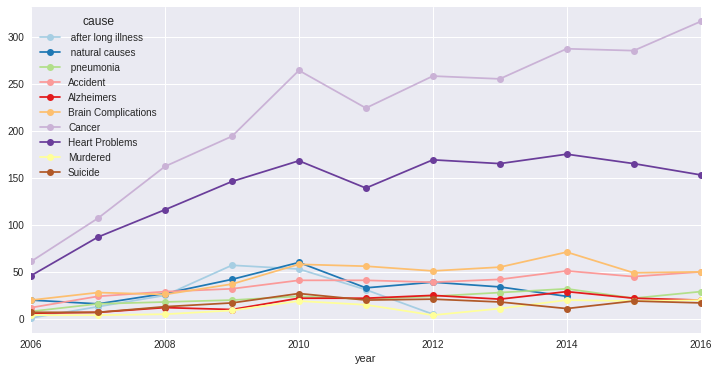

In [16]:
dd1=deaths_2.groupby(['cause_of_death','death_year'])['death_month'].count().reset_index()
dd1=dd1[dd1['cause_of_death'].isin(deaths_2['cause_of_death'].value_counts()[:10].index)]
dd1.columns=[['cause','year','count']]
dd1.pivot('year','cause','count').plot(marker='o',colormap='Paired')
fig=plt.gcf()
fig.set_size_inches(12,6)

We can see that how the deaths by Cancer and Heart Problems have steadily increased in the past few years.

### Countries with highest Deaths

In [17]:
data = [go.Bar(
            x=deaths['nationality'].value_counts()[:10].index,
            y=deaths['nationality'].value_counts()[:10].values,
        marker = dict(
        color = 'rgba(41, 221, 239,0.8)',)
            
)]

py.iplot(data, filename='horizontal-bar')

### Deaths By Countries by Year

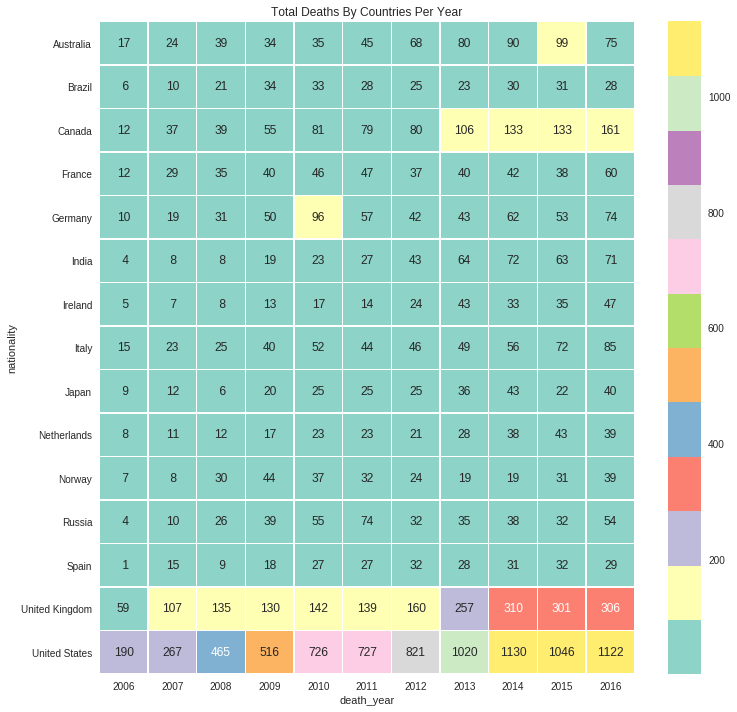

In [18]:
top_countries=deaths['nationality'].value_counts()[:15]
all_deaths=deaths['cause_of_death'].value_counts()
countries=deaths[deaths['nationality'].isin(top_countries.index)]
countries=countries[countries['cause_of_death'].isin(all_deaths.index)]
countries=countries[['cause_of_death','death_year','nationality']]
countries=countries.groupby(['nationality','death_year'])['cause_of_death'].count().reset_index()
countries.columns=[['nationality','death_year','count']]
countries=countries.pivot('nationality','death_year','count')
sns.heatmap(countries,cmap='Set3',annot=True,fmt='2.0f',linewidths=0.4)
plt.title('Total Deaths By Countries Per Year')
fig=plt.gcf()
fig.set_size_inches(12,12)

The above heatmap shows the number of deaths in the Top Countries by Year.

### Types Of Deaths By Famous_for 

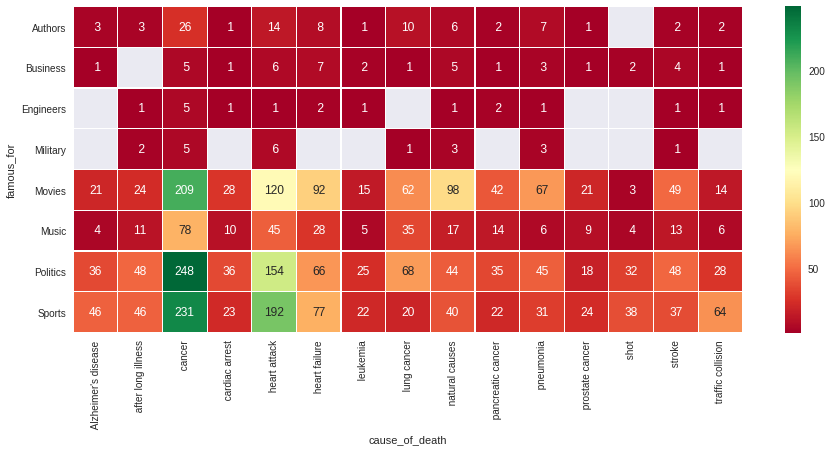

In [19]:
_deaths=deaths[deaths['cause_of_death']!='unknown']
type_deaths=_deaths['cause_of_death'].value_counts()[:15]
type_deaths.index
deaths_1=deaths[deaths['famous_for'].isin(['Business','Sports','Politics','Movies','Authors','Engineers','Military','Music'])]
deaths_1=deaths_1[deaths_1['cause_of_death']!='unknown']
deaths_1=deaths_1[deaths_1['cause_of_death'].isin(type_deaths.index)] 
deaths_1=deaths_1.groupby(['famous_for','cause_of_death'])['death_year'].count().reset_index()
deaths_1=deaths_1.pivot('famous_for','cause_of_death','death_year')
sns.heatmap(deaths_1,cmap='RdYlGn',annot=True,fmt='2.0f',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,6)

### Types of Deaths By Countries

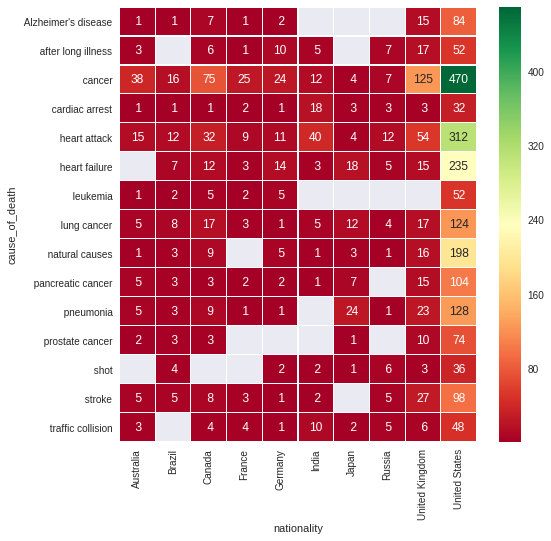

In [20]:
_countries=deaths[deaths['cause_of_death']!='unknown']
_countries=_deaths['nationality'].value_counts()[:10]
deaths_1=deaths[deaths['nationality'].isin(_countries.index)]
deaths_1=deaths_1[deaths_1['cause_of_death']!='unknown']
deaths_1=deaths_1[deaths_1['cause_of_death'].isin(type_deaths.index)] 
deaths_1=deaths_1.groupby(['cause_of_death','nationality'])['death_year'].count().reset_index()
deaths_1=deaths_1.pivot('cause_of_death','nationality','death_year')
sns.heatmap(deaths_1,cmap='RdYlGn',annot=True,fmt='2.0f',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(8,8)

**Observations From Above Heatmaps:**

 1. **Cancer** is the leading cause of deaths across the world irrespective of the countries or the profession.
 2. Not every cause of death is that relevant in different countries. The blank spots show that disease like **leukemia** has not killed anyone in countries like **Germany, India** , etc. Similar is the case with some professions.

### GeoMap For Deaths By Countries

I am completely new to Plotly which we will be using for drawing the Geomaps. A big thanks to [Anistropic][1] for helping with the geomaps. Do check his notebooks.


  [1]: https://www.kaggle.com/arthurtok

Geomaps take the input as Country Code for determining a country. I have thus mapped the countries to their country codes dor showing the total deaths in a country. 

In [21]:
l1=list(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Democratic Republic of the',
       'Congo, Republic of the', 'Cook Islands', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Falkland Islands (Islas Malvinas)', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia, The',
       'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland',
       'Grenada', 'Guam', 'Guatemala', 'Guernsey', 'Guinea-Bissau',
       'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Korea, North',
       'Korea, South', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia',
       'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Macau', 'Macedonia', 'Madagascar',
       'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico',
       'Micronesia, Federated States of', 'Moldova', 'Monaco', 'Mongolia',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua',
       'Nigeria', 'Niger', 'Niue', 'Northern Mariana Islands', 'Norway',
       'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Rwanda',
       'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin',
       'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
       'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia',
       'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore',
       'Sint Maarten', 'Slovakia', 'Slovenia', 'Solomon Islands',
       'Somalia', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka',
       'Sudan', 'Suriname', 'Swaziland', 'Sweden', 'Switzerland', 'Syria',
       'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste',
       'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Virgin Islands', 'West Bank', 'Yemen', 'Zambia', 'Zimbabwe']) #Country names

In [22]:
l2=list(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHM', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'MMR', 'BDI', 'CPV', 'KHM',
       'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM',
       'COD', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ',
       'ERI', 'EST', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF',
       'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD',
       'GUM', 'GTM', 'GGY', 'GNB', 'GIN', 'GUY', 'HTI', 'HND', 'HKG',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR',
       'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'KOR',
       'PRK', 'KSV', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR',
       'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MKD', 'MDG', 'MWI', 'MYS',
       'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA',
       'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'NAM', 'NPL', 'NLD', 'NCL',
       'NZL', 'NIC', 'NGA', 'NER', 'NIU', 'MNP', 'NOR', 'OMN', 'PAK',
       'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'PRI',
       'QAT', 'ROU', 'RUS', 'RWA', 'KNA', 'LCA', 'MAF', 'SPM', 'VCT',
       'WSM', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP',
       'SXM', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'SSD', 'ESP', 'LKA',
       'SDN', 'SUR', 'SWZ', 'SWE', 'CHE', 'SYR', 'TWN', 'TJK', 'TZA',
       'THA', 'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TUV',
       'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN',
       'VNM', 'VGB', 'WBG', 'YEM', 'ZMB', 'ZWE']) #Country Codes

In [23]:
df=pd.DataFrame(l1,l2)
df.reset_index(inplace=True)
df.columns=[['Code','Country']]

In [24]:
dea1=deaths.merge(df,left_on='nationality',right_on='Country',how='outer')
dea1=dea1.groupby('Country')['death_year'].count().reset_index().sort_values(by='death_year',ascending=False)
dea1=dea1.merge(df,left_on='Country',right_on='Country',how='right')
dea2=dea1[dea1['death_year']!=0]
dea2.columns=[['Country','Deaths_Count','Code']]
dea2.shape

(71, 3)

So I was able to filter out **71** countries from the **496** unique country names given in the original dataset. The original dataset had a lot of noisy data and also not every value was a country name. Some of the values were related.

Majority of the values were based on what the people of a certain countries are known as . Like for **India** it was **Indians** ,etc. 

In [25]:
data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = 'Viridis',
        reversescale = True,
        showscale = True,
        locations = dea2['Code'],
        z = dea2['Deaths_Count'],
        locationmode = 'Code',
        text = dea2['Country'].unique(),
        marker = dict(
            line = dict(color = 'rgb(200,200,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Deaths')
            )
       ]

layout = dict(
    title = 'Total Deaths By Country',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(0,0,0)',
        projection = dict(
        type = 'Mercator',
            
        ),
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2010')

Till Now we have just got a brief overview of the dataset.

Some Observations like **Cancer** is the leading cause of death

**USA** has the highest death toll, etc have been identified. Now we will try to dig in the dataset to find out more inferences.

## Deaths By Cancer

As we had already seen that Cancer was the major cause of deaths, we will try to do some deeper analysis.


### Different Types Of Cancer

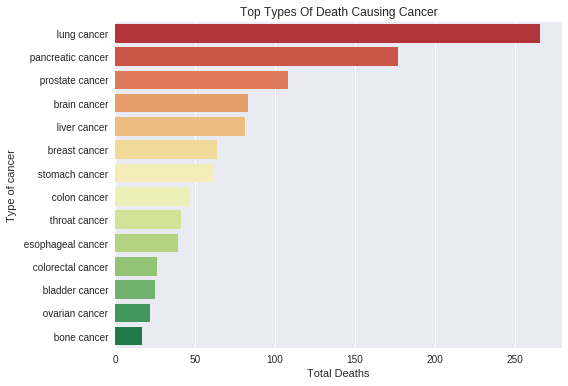

In [26]:
deaths_cancer=deaths[deaths['cause_of_death'].str.contains('cancer')]
deaths_cancer=deaths_cancer.groupby(['cause_of_death'])['death_year'].count().reset_index()
deaths_cancer=deaths_cancer.sort_values(by='death_year',ascending=False)[1:15]
sns.barplot(x='death_year',y='cause_of_death',data=deaths_cancer,palette='RdYlGn').set_title('Top Types Of Death Causing Cancer')
plt.xlabel('Total Deaths')
plt.ylabel('Type of cancer')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

As seen above, Lungs cancer is the major type of cancer causing the deaths followed by pancreatic cancer. 

([<matplotlib.axis.XTick at 0x7f60f9313e80>,
 <a list of 11 Text xticklabel objects>)

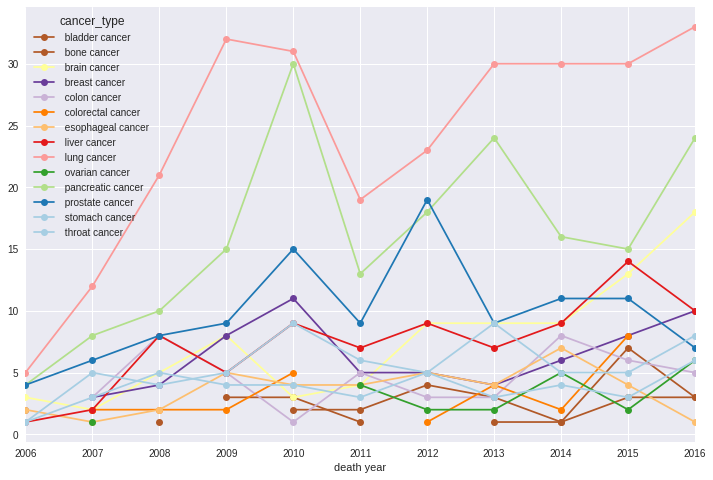

In [27]:
deaths_2=deaths[deaths['cause_of_death'].isin(deaths_cancer['cause_of_death'])]
abc=deaths_2.groupby(['cause_of_death','death_year'])['death_month'].count().reset_index()
deaths=deaths_2
abc.columns=[['cancer_type','death year','Count']]
abc=abc.pivot('death year','cancer_type','Count')
abc.plot(marker='o',colormap='Paired_r')
ticks=range(2006,2017)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.xticks(ticks)

The above graph clearly shows the **peaks** for **Lungs Cancer** ,**Pancreatic Cancer** and **Prostate Cancer**. The number of these types of cancer has been increasing in the past years. 

### Map for Deaths By Cancer

In [28]:
deaths_cancer=deaths.copy()
mask1 = deaths_cancer['cause_of_death'].str.contains('cancer|Cancer')
deaths_cancer.loc[True & mask1, 'cause_of_death']='Cancer'
deaths_cancer=deaths_cancer[deaths_cancer['cause_of_death']=="Cancer"]
deaths_cancer=deaths_cancer.groupby(['nationality'])['death_year'].count().reset_index()
deaths_cancer=deaths_cancer.merge(df,left_on='nationality',right_on='Country',how='right')
deaths_cancer.dropna(inplace=True)
deaths_cancer=deaths_cancer[['nationality','death_year','Code']]
deaths_cancer.columns=[['Country','Count','Code']]

data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = 'Viridis',
        reversescale = True,
        showscale = True,
        locations = deaths_cancer['Code'],
        z = deaths_cancer['Count'],
        locationmode = 'Code',
        text = deaths_cancer['Country'],
        marker = dict(
            line = dict(color = 'rgb(200,200,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Deaths')
            )
       ]

layout = dict(
    title = 'Total Deaths By Cancer',
    geo = dict(
        showframe = True,
        showocean = True,
        coastlines = True,
        oceancolor = 'rgb(0,0,0)',
        projection = dict(
        type = 'Mercator',
            
        ),
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2010')

### 2016 Death Analysis

As we had seen earlier that the number of deaths were highest in the year 2016. So let us check for some deeper insights.

### Checking the Countries

In [29]:
year2016=deaths[deaths['death_year']==2016]
before2016=deaths[deaths['death_year']!=2016]
df1=year2016['nationality'].value_counts().reset_index()
df2=before2016['nationality'].value_counts().reset_index()
df1=df1.merge(df2,left_on='index',right_on='index',how='right')[1:17]
df1.columns=[['country','2016','before 2016']]

In [30]:
x=list(df1['country'].values)
y=list(df1['before 2016'].values)
y1=list(df1['2016'].values)
trace0 = go.Bar(
    x=x,
    y=y,
    name='Deaths before 2016',
    
)
trace1 = go.Bar(
    x=x,
    y=y1,
    name='Deaths 2016',
    
)

data = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='stack',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

**Hover** over the graph to see the values.

Some interesting observations were for **China** and **New Zealand**. A lot many people died in these 2 countries as compared to the previous years. 

China has almost 30% of its total deaths in 2016.

### Checking The Causes

In [31]:
year2016=deaths_2[deaths_2['death_year']==2016]
before2016=deaths_2[deaths_2['death_year']!=2016]
df1=year2016['cause_of_death'].value_counts().reset_index()[1:]
df2=before2016['cause_of_death'].value_counts().reset_index()[1:]
df1=df1.merge(df2,left_on='index',right_on='index',how='right')[:10]
df1.columns=[['cause','2016','before 2016']]

x=list(df1['cause'].values)
y=list(df1['before 2016'].values)
y1=list(df1['2016'].values)
trace0 = go.Bar(
    x=x,
    y=y,
    name='Deaths before 2016',
    marker=dict(
                color='rgb(158,225,225)',)
    
)
trace1 = go.Bar(
    x=x,
    y=y1,
    name='Deaths 2016',
    
)

data = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='stack',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

### Deaths By Countries in 2016

In [32]:
year2016=deaths[deaths['death_year']==2016]
dea1=year2016.merge(df,left_on='nationality',right_on='Country',how='outer')
dea1=dea1.groupby('Country')['death_year'].count().reset_index().sort_values(by='death_year',ascending=False)
dea1=dea1.merge(df,left_on='Country',right_on='Country',how='right')
dea2=dea1[dea1['death_year']!=0]
dea2.columns=[['Country','Deaths_Count','Code']]


data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = 'Viridis',
        reversescale = True,
        showscale = True,
        locations = dea2['Code'],
        z = dea2['Deaths_Count'],
        locationmode = 'Code',
        text = dea2['Country'].unique(),
        marker = dict(
            line = dict(color = 'rgb(200,200,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Deaths')
            )
       ]

layout = dict(
    title = 'Total Deaths By Country in 2016',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'Mercator',
            
        ),
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2010')

### Stay Tuned